# 1. Gaussove eliminacije i LU rastav 

Implementacija funkcije koja računa $LU$ rastav matrice A

In [1]:
import numpy as np
def LU_dekompozicija(A):
    n=len(A)
    for k in range(0,n-1):
        for i in range(k+1,n):
            if A[i,k]!=0.0:
                A[i,k]=A[i,k]/(A[k,k]) #multiplikator 
                A[i, k+1:n]=A[i, k+1:n]-A[i,k]*A[k, k+1:n]
    return A
    

Funkciju ćemo primijeniti na matrici $$\begin{bmatrix} 2& 1& 0\\ 4& 4& 5\\ 6& 7& 8\end{bmatrix}$$
Kao izlaz dobivamo matricu čiji gornji trokut je matrica $U$ a elementi ispod glavne dijagonale su elementi matrice $L$

In [2]:
A=np.array([[2.0, 1.0, 3.0 ],[4.0, 4.0, 5.0], [6.0, 7.0, 8.0]])
B=LU_dekompozicija(A)
print(B)

[[ 2.  1.  3.]
 [ 2.  2. -1.]
 [ 3.  2.  1.]]


Matricu $L$ možemo dobiti preko funkcije np.tril (proučiti kako ova funkcija radi), a matricu $U$ pomoću **np.triu(ulazna matrica, id dijagonale)**

Funkcija *tril(ulazna matrica, identifikator dijagonale )* vraća matricu koja uzima donji dio ulazne matrice ispod(i uključujući) dijagonalu s time da glavna dijagonala ima identfikator 1, dijagonala iznad nje 1 i dijagonala ispod -1 itd. Slično je sa funkcijom *triu(ulazna matrica, id dijagonale)*

In [3]:
L=np.tril(A,-1)+np.identity(3)
print(L)

[[1. 0. 0.]
 [2. 1. 0.]
 [3. 2. 1.]]


In [4]:
U=np.triu(A,0)
print(U)

[[ 2.  1.  3.]
 [ 0.  2. -1.]
 [ 0.  0.  1.]]


Rješavanje sustava Ly=b (supstitucije unaprijed). u donjem kodu  funkcija np.dot(x,y) predstavja skalarni produkt vektora. (Dijagonalni elementi od $L$ su 1 pa nije ni potrebni dijeliti s dijagonalnim elementima u donjem kodu)

In [5]:
def forward(L,b):
# supstitucija unaprijed
    b[0] = b[0] / L[0, 0]
    n=len(L)
    for i in range(1, n):
        b[i] = (b[i] - np.dot(L[i,:i], b[:i])) / L[i,i]
    return b

In [6]:
b=np.array([[-1],[-1],[-2]])

In [7]:
y=forward(L,b)
print(y)


[[-1]
 [ 1]
 [-1]]


Rješavanje sustava $Ux=y$ odnosno povratne supstitucije

In [8]:
def backward(U,b):
# supstitucija unatrag
    n=len(U)
    for k in range(n-1,-1,-1):
        b[k] = (b[k] - np.dot(U[k,k+1:n],b[k+1:n]))/U[k,k]
    return b

In [9]:
x=backward(U,y)
print(x)

[[ 1]
 [ 0]
 [-1]]


## 2. Kako nastaje linearan sustav. Primjer trodijagonalnog sustava. Thomasov algoritam

U ovom dijelu predavanja prikazat ćemo kako nastaje jedan trodijagonalni linearan sustav iz diskretizacije diferencijalne jednadžbe.


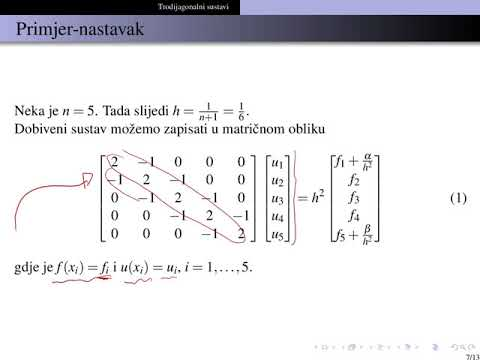

In [10]:
from IPython.lib.display import YouTubeVideo
vid = YouTubeVideo("9vwZLHGMMGg")
display(vid)

**Napomena** U gornjem videu na str6. za $i=5$ je pogreška (ne treba lijevu stranu množiti s $\frac{1}{h^2}$ jer je već faktor $h^2$ već na desnoj strani)

**Zadatak** Razmislite o implementaciji Thomasovog algoritma iz prethodnog video predavanja kojeg primijenjujemo za rješavanje diferencijelne jednadžbe i po volji odabranu desnu stranu! Također svoje rješenje prikažite grafički i usporedite s točnim rješenjem! Ovdje će implementacija biti dodana do početka sljedećeg predavanja!

# Implementacija Thomasovog algoritma i numeričko rješavanje rubnog problema
Najprije definiramo funkciju koja kao izlaz ima vektore iz LU dekompozicije trodijagonalne matrice. Dakle ako je matrica oblika
$$A=\begin{bmatrix}
b_{1} & c_{1} &    &    &  &  &   \\
a_2   & b_{2} & c_2  &   &    &    \\
&  a_3  & b_3 & c_3    &   &    \\
&     &  \ddots &  \ddots & \ddots &    \\
&     &   &  a_{n-1} & b_{n-1} &  c_{n-1}   \\
&   &  &  & a_{n} & b_{n}
\end{bmatrix}$$

u donjem ćemo kodu zapravo imati vektore
$$b=\left[b_0,\ldots,b_{n-1}\right]$$
$$a=\left[a_0,\ldots,a_{n-2}\right]$$
$$c=\left[c_0,\ldots,c_{n-2}\right]$$

buduci da Python indeksira vektore od 0. Ova funkcija izlaze ponovno posprema u navedene vektore. Dakle vektor koji predstavlja prvu donju dijagonalu matrice $L$ je pospremljen u vektor $a$, dok je vektor glavne dijagonale matrice $U$ pospremljen u vektor $b$ a vektor prve gornje dijagonale matrice $U$ pospremljen je u vektor $c$.

In [11]:
def LUdecomptridiagonal(a,b,c):
    n=len(b)
    for k in range(1,n):
        mu=a[k-1]/b[k-1]
        b[k]=b[k]-mu*c[k-1]
        a[k-1]=mu
    return a,b,c

Sada definiramo funkciju koja za dane ulazne vektore (koji predstavljaju donju dijagonalu matrice $L$, glavnu i gornju dijagonalu matrice $U$) rješava sustav $Ax=f$ koristeći $LU$ rastv matrice $A$. Pri tome rješenje sprema u vektor $f$

In [12]:
def LUsolvetridiagonal(a,b,c,f):
    n=len(b)
    for k in range(1,n):
        f[k]=f[k]-a[k-1]*f[k-1]
    f[n-1]=f[n-1]/b[n-1]
    for k in range(n-2,-1,-1):
        f[k]=(f[k]-c[k]*f[k+1])/b[k]
    return f

u doljnjem dijelu koda postavljamo elemente svih ulaznih vektora. Zašto ovako izgledaju -vidi video iznad ove implementacije

In [13]:
def  set_abcf(x, alpha, beta):
    n=len(x)-2
    h=1.0/(n+1)
    f=np.ones((n))*h*h
    b=np.ones((n))*2.0
    a=np.ones((n-1))*(-1)
    c=np.ones((n-1))*(-1)
    for i in range(1,n+1):
        f[i-1]=f[i-1]*RHS_b(x[i])
    f[0]=f[0]+alpha
    f[n-1]=f[n-1]+ beta
    return a, b, c, f

Ovdje definiamo desnu strnu našeg problema, odnosno rješavat ćemo rubni problem
\begin{align*}
-u''(x) & = 16\pi^2\sin(4\pi x),\quad x\in(0,1) \\
u(0)= & u(1)=0.
\end{align*}

Nije teško izračunati analitički da je rješenje ovog problema funkcija $u(x)=\sin(4\pi x)$

In [14]:
def RHS_b(x):
    return 16.0*np.pi*np.pi*np.sin(4.0*np.pi*x)


U sljedećem dijelu koda odabiremo $n=5$ i uvodimo biblioteku za crtanje matplotlib

In [15]:
n1=5
n11=n1+2
x1=np.linspace(0,1,n11)
import matplotlib.pyplot as plt

Sad postavljamo vektore za $n=5$ i rješavamo sustav

In [16]:
a,b,c,f=set_abcf(x1,0,0)
a,b,c=LUdecomptridiagonal(a,b,c)
u=LUsolvetridiagonal(a,b,c,f)

Definiramo i funkciju koja je egzaktno rješenje našeg problema da vidimo koliko je aprokimacija dobra

In [17]:
def Exact_solution(x):
    return np.sin(4.0*np.pi*x)

Sada plotamo egzaktno rješenje, i naše aproksimacije prikazane crvenim točkama

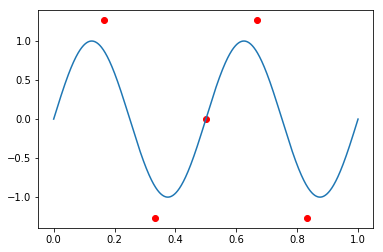

In [18]:
n=len(x1)
z1=np.linspace(0,1,1000)
plt.plot(x1[1:n-1],u, "ro")
plt.plot(z1, Exact_solution(z1))

Sada ćemo uzeti gušću mrežu i vidjeti hoće li naša aproksimacija rješenja u danim točkama biti bolja

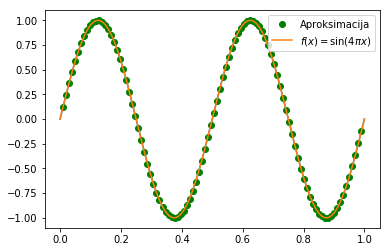

In [30]:

n3=100
n33=n3+2
x3=np.linspace(0,1,n33)
a,b,c,f=set_abcf(x3,0,0)
a,b,c=LUdecomptridiagonal(a,b,c)
u=LUsolvetridiagonal(a,b,c,f)
plt.plot(z1, Exact_solution(z1))
z1=np.linspace(0,1,1000)

plt.plot(x3[1:n33-1],u, "go", label='Aproksimacija')
plt.plot(z1, Exact_solution(z1), label=r"$f(x)=\sin(4\pi x)$")

plt.legend(loc='upper right', fontsize=10)

plt.savefig('aproksimacija.pdf')


Vidimo da povećanjem broja točaka dobivamo i bolju aproksimaciju rješenja.